In [1]:
import pandas as pd
df = pd.read_csv('weather.csv')
df.head()

,date,precipitation,temp_max,temp_min,wind,weather
0,2012-01-01,0.0,12.8,5.0,4.7,drizzle
1,2012-01-02,10.9,10.6,2.8,4.5,rain
2,2012-01-03,0.8,11.7,7.2,2.3,rain
3,2012-01-04,20.3,12.2,5.6,4.7,rain
4,2012-01-05,1.3,8.9,2.8,6.1,rain


In [5]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['weather']=le.fit_transform(df['weather'])
df.head()

,date,precipitation,temp_max,temp_min,wind,weather
0,2012-01-01,0.0,12.8,5.0,4.7,0
1,2012-01-02,10.9,10.6,2.8,4.5,2
2,2012-01-03,0.8,11.7,7.2,2.3,2
3,2012-01-04,20.3,12.2,5.6,4.7,2
4,2012-01-05,1.3,8.9,2.8,6.1,2


In [7]:


df.shape



(1461, 6)

<Axes: xlabel='precipitation', ylabel='wind'>

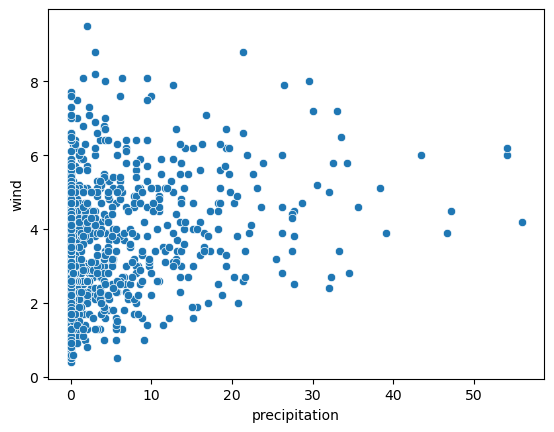

In [11]:
import seaborn as sns
sns.scatterplot(x=df['precipitation'],y=df['wind'])

C:\Users\muham\AppData\Local\Temp\ipykernel_17536\618234192.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x=df['temp_max'],kde=True)


<Axes: ylabel='Density'>

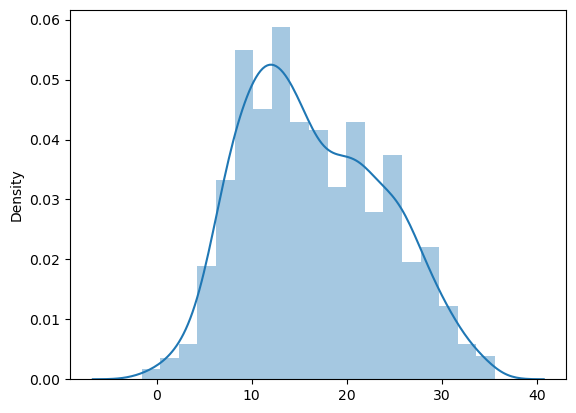

In [15]:
sns.distplot(x=df['temp_max'],kde=True)

C:\Users\muham\AppData\Local\Temp\ipykernel_17536\2215035998.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x=df['temp_min'])


<Axes: ylabel='Density'>

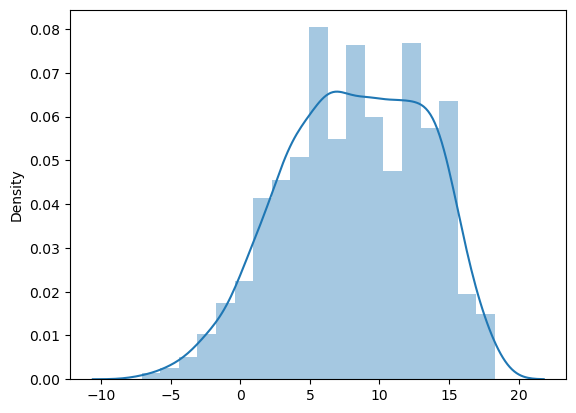

In [19]:
sns.distplot(x=df['temp_min'])

C:\Users\muham\AppData\Local\Temp\ipykernel_17536\10535665.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x=df['weather'])


<Axes: ylabel='Density'>

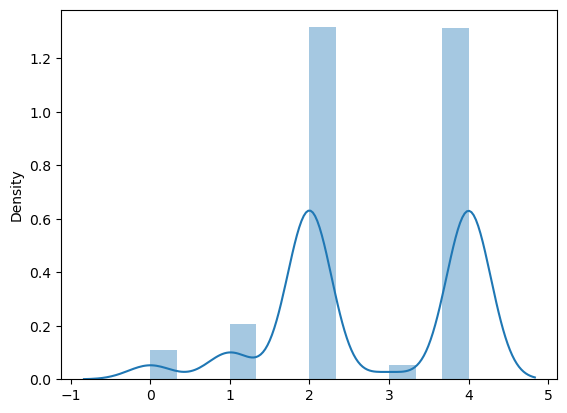

In [21]:
sns.distplot(x=df['weather'])

In [23]:
df1=df.copy()
df1

,date,precipitation,temp_max,temp_min,wind,weather
0,2012-01-01,0.0,12.8,5.0,4.7,0
1,2012-01-02,10.9,10.6,2.8,4.5,2
2,2012-01-03,0.8,11.7,7.2,2.3,2
3,2012-01-04,20.3,12.2,5.6,4.7,2
4,2012-01-05,1.3,8.9,2.8,6.1,2
...,...,...,...,...,...,...
1456,2015-12-27,8.6,4.4,1.7,2.9,2
1457,2015-12-28,1.5,5.0,1.7,1.3,2
1458,2015-12-29,0.0,7.2,0.6,2.6,1
1459,2015-12-30,0.0,5.6,-1.0,3.4,4


In [37]:


x=df1[['precipitation','weather']]
x.head()


,precipitation,weather
0,0.0,0
1,10.9,2
2,0.8,2
3,20.3,2
4,1.3,2


In [39]:
wcss=[]

<function matplotlib.pyplot.show(close=None, block=None)>

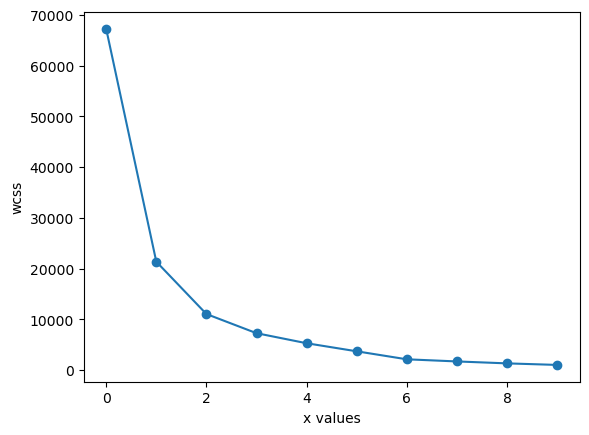

In [41]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
wcss=[]
for i in range(1,11):
    km=KMeans(n_clusters=i)
    km.fit(x)
    wcss.append(km.inertia_)
import matplotlib.pyplot as plt
plt.plot(wcss,marker='o')
plt.xlabel('x values')
plt.ylabel('wcss')
plt.show

In [43]:
wcss

[67224.7996988363,
 21365.76271953571,
 11053.507249823433,
 7277.746871469614,
 5297.558264878138,
 3708.416722411338,
 2132.1008066512422,
 1711.3542048425545,
 1330.2506293439405,
 1025.238355752411]

In [45]:
km1 = KMeans(n_clusters=4)

km1

KMeans(n_clusters=4)

In [47]:
km1.fit(x)

KMeans(n_clusters=4)

In [49]:
y_pred=km1.predict(x)
y_pred

array([0, 3, 0, ..., 0, 0, 0])

In [51]:
df1['Label']=y_pred
df1.head()

,date,precipitation,temp_max,temp_min,wind,weather,Label
0,2012-01-01,0.0,12.8,5.0,4.7,0,0
1,2012-01-02,10.9,10.6,2.8,4.5,2,3
2,2012-01-03,0.8,11.7,7.2,2.3,2,0
3,2012-01-04,20.3,12.2,5.6,4.7,2,1
4,2012-01-05,1.3,8.9,2.8,6.1,2,0


<Axes: xlabel='temp_min', ylabel='weather'>

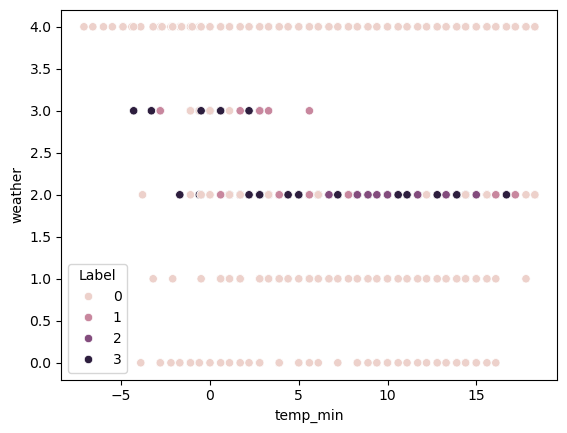

In [55]:
sns.scatterplot(x=df1['temp_min'],y=df1['weather'],hue=df1['Label'])

In [57]:
from sklearn import metrics
score = metrics.silhouette_score(x,df1["Label"])
score

0.6756857524429858